I will start the task of demand and supply analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
#import plotly.express as px
#import plotly.graph_objects as go
#import plotly.io as pio
#pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\dell\Documents\EDA Dataset\rides.csv")

In [2]:
print(data.head())

   Drivers Active Per Hour  Riders Active Per Hour  Rides Completed
0                       72                     295            202.0
1                       50                      78             43.0
2                       40                     250            181.0
3                       78                     140            124.0
4                       74                     195            108.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


In [4]:
data.shape

(1099, 3)

In [5]:
print(data.isnull().sum())

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64


The dataset has 54 null values in the Rides Completed column. I’ll drop these rows and move forward

In [6]:
data = data.dropna()

Analyzed the relationship between the number of drivers active per hour and the number of riders active per hour

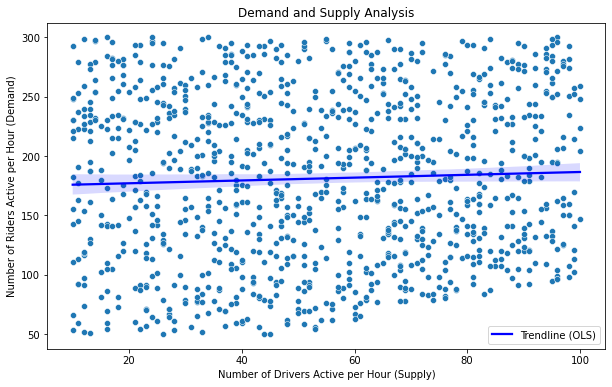

In [8]:
import seaborn as sns

demand = data["Riders Active Per Hour"]
supply = data["Drivers Active Per Hour"]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=supply, y=demand)
sns.regplot(x=supply, y=demand, scatter=False, color='blue', label='Trendline (OLS)')
plt.title("Demand and Supply Analysis")
plt.xlabel("Number of Drivers Active per Hour (Supply)")
plt.ylabel("Number of Riders Active per Hour (Demand)")
plt.legend()
plt.show()


There is a constant relationship between the number of drivers active per hour and the number of riders active per hour. A constant relationship between the number of drivers active per hour and the number of riders active per hour means that for every X number of drivers, there is a consistent and predictable Y number of riders, and this ratio remains constant over time.


Calculated the elasticity of demand for rides concerning the number of active drivers per hour:

In [9]:
# Calculate elasticity
avg_demand = data['Riders Active Per Hour'].mean()
avg_supply = data['Drivers Active Per Hour'].mean()
pct_change_demand = (max(data['Riders Active Per Hour']) - min(data['Riders Active Per Hour'])) / avg_demand * 100
pct_change_supply = (max(data['Drivers Active Per Hour']) - min(data['Drivers Active Per Hour'])) / avg_supply * 100
elasticity = pct_change_demand / pct_change_supply

print("Elasticity of demand with respect to the number of active drivers per hour: {:.2f}".format(elasticity))

Elasticity of demand with respect to the number of active drivers per hour: 0.82


It signifies a moderately responsive relationship between the demand for rides and the number of active drivers per hour. Specifically, this means that a 1% increase in the number of active drivers per hour would lead to a 0.82% decrease in the demand for rides, while a 1% decrease in the number of active drivers per hour would lead to a 0.82% increase in the demand for rides.

This level of elasticity suggests that the demand for rides is somewhat sensitive to changes in the number of active drivers per hour.

In [10]:
# Calculate the supply ratio for each level of driver activity
data['Supply Ratio'] = data['Rides Completed'] / data['Drivers Active Per Hour']
print(data.head())

   Drivers Active Per Hour  Riders Active Per Hour  Rides Completed  \
0                       72                     295            202.0   
1                       50                      78             43.0   
2                       40                     250            181.0   
3                       78                     140            124.0   
4                       74                     195            108.0   

   Supply Ratio  
0      2.805556  
1      0.860000  
2      4.525000  
3      1.589744  
4      1.459459  


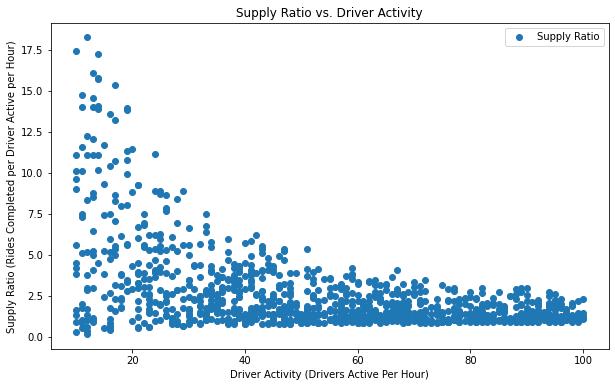

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['Drivers Active Per Hour'], data['Supply Ratio'], label='Supply Ratio', marker='o')
ax.set_title('Supply Ratio vs. Driver Activity')
ax.set_xlabel('Driver Activity (Drivers Active Per Hour)')
ax.set_ylabel('Supply Ratio (Rides Completed per Driver Active per Hour)')
ax.legend()
plt.show()


The above graph shows the ratio of the number of drivers active per hour and the number of rides completed in an hour.

In [13]:
len(data)

1045